<a href="https://colab.research.google.com/github/mzr1996/mmclassification_tutorial/blob/master/1.x/MMClassification_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMClassification Python API tutorial on Colab

In this tutorial, we will introduce the following content:

* How to install MMCls
* Inference a model with Python API
* Fine-tune a model with Python API

## Install MMClassification

Before using MMClassification, we need to prepare the environment with the following steps:

1. Install Python, CUDA, C/C++ compiler and git
2. Install PyTorch (CUDA version)
3. Install mmcv
4. Clone mmcls source code from GitHub and install it

Because this tutorial is on Google Colab, and the basic environment has been completed, we can skip the first two steps.

### Check environment

In [1]:
%cd /content

/content


In [2]:
!pwd

/content


In [3]:
# Check nvcc version
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [4]:
# Check GCC version
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.12.1+cu113
True


### Install MMCV

MMCV is the basic package of all OpenMMLab packages. We have pre-built wheels on Linux, so we can download and install them directly.

To choose MMCV compiled with appropriate PyTorch and CUDA version, we use `mim` to install it.

In [6]:
# Install mim
!pip install openmim
# Install MMCV
!mim install "mmcv>=2.0.0rc1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.8 MB/s 
     |████████████████████████████████| 237 kB 46.4 MB/s 
     |████████████████████████████████| 51 kB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 43.2 MB 315 kB/s 
     |████████████████████████████████| 305 kB 43.6 MB/s 
     |████████████████████████████████| 190 kB 71.2 MB/s 


### Clone and install MMClassification

Next, we clone the latest mmcls repository from GitHub and install it.

In [7]:
# Clone mmcls repository and checkout to the 1.x branch
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/
!git checkout 1.x

# Install MMClassification from source
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 11348, done.
remote: Counting objects: 100% (433/433), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 11348 (delta 186), reused 285 (delta 127), pack-reused 10915
Receiving objects: 100% (11348/11348), 11.09 MiB | 7.66 MiB/s, done.
Resolving deltas: 100% (7792/7792), done.
/content/mmclassification
Branch '1.x' set up to track remote branch '1.x' from 'origin'.
Switched to a new branch '1.x'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmclassification
  Running setup.py develop for mmcls


In [8]:
# Check MMClassification installation
import mmcls
print(mmcls.__version__)

1.0.0rc3


## Inference a model with Python API

MMClassification provides many pre-trained models, and you can check them by the link of [model zoo](https://mmclassification.readthedocs.io/en/1.x/modelzoo_statistics.html). Almost all models can reproduce the results in original papers or reach higher metrics. And we can use these models directly.

To use the pre-trained model, we need to do the following steps:

- Prepare the model
  - Prepare the config file
  - Prepare the checkpoint file
- Build the model
- Inference with the model

In [9]:
# Get the demo image
!wget https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0 -O demo/banana.png

--2022-11-23 01:22:07--  https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/k5fsqi6qha09l1v/banana.png [following]
--2022-11-23 01:22:07--  https://www.dropbox.com/s/raw/k5fsqi6qha09l1v/banana.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d372d5f0110192f715f05a00d.dl.dropboxusercontent.com/cd/0/inline/BxRUm0Jq66yGUHAjvBDGyblpgmFEy7CQebxoAR3czb4pB6Uj8liTKtHFN-ic9RMxS-yUn0tjm8_bwrswVbS5wQ3sj4sGealgly6fcApYLH82SNu-_WdZnydFM02W6dMPh4XDvDpVJNNL-HA4l2U6l9Smh_8Ao71fxrtT-ux7GsTnVg/file# [following]
--2022-11-23 01:22:07--  https://uc2d372d5f0110192f715f05a00d.dl.dropboxusercontent.com/cd/0/inline/BxRUm0Jq66yGUHAjvBDGyblpgmFEy7CQebxoAR3czb4pB6Uj8liTKtHFN-ic9RMxS-yUn0tjm8_bwr

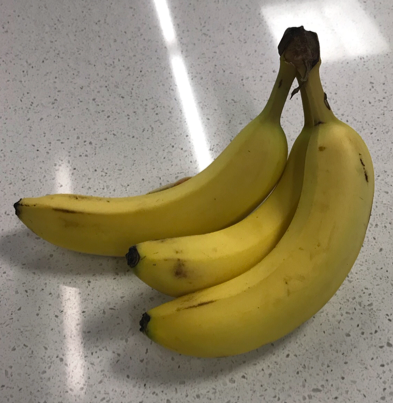

In [10]:
from PIL import Image
Image.open('demo/banana.png')

### Prepare the config file and checkpoint file

We configure a model with a config file and save weights with a checkpoint file.

On GitHub, you can find all these pre-trained models in the config folder of MMClassification. For example, you can find the config files and checkpoints of Mobilenet V2 in [this link](https://github.com/open-mmlab/mmclassification/tree/1.x/configs/mobilenet_v2).

We have integrated many config files for various models in the MMClassification repository. As for the checkpoint, we can download it in advance, or just pass an URL to API, and MMClassification will download it before load weights.

In [11]:
# Confirm the config file exists
!ls configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py

# Specify the path of the config file and checkpoint file.
config_file = 'configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py'
checkpoint_file = 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py


### Inference the model

MMClassification provides high-level Python API to inference models.

At first, we build the MobilenetV2 model and load the checkpoint.

In [12]:
import mmcv
from mmcls.apis import inference_model, init_model

# Specify the device, if you cannot use GPU, you can also use CPU 
# by specifying `device='cpu'`.
device = 'cuda:0'
# device = 'cpu'

# Build the model according to the config file and load the checkpoint.
model = init_model(config_file, checkpoint_file, device=device)

http loads checkpoint from path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


Downloading: "https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


  0%|          | 0.00/13.5M [00:00<?, ?B/s]

/content/mmclassification/mmcls/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [13]:
# The model's inheritance relationship
model.__class__.__mro__

(mmcls.models.classifiers.image.ImageClassifier,
 mmcls.models.classifiers.base.BaseClassifier,
 mmengine.model.base_model.base_model.BaseModel,
 mmengine.model.base_module.BaseModule,
 torch.nn.modules.module.Module,
 object)

In [14]:
# The inference result in a single image
img = 'demo/banana.png'
img_array =  mmcv.imread(img)
result = inference_model(model, img_array)
print(result.keys())
print('Prediction:', result['pred_class'])

/usr/local/lib/python3.7/dist-packages/mmengine/fileio/file_client.py:90: DeprecationWarning: "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/mmengine/fileio/file_client.py:19: DeprecationWarning: "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
  'and the former will be deprecated in future.', DeprecationWarning)


dict_keys(['pred_label', 'pred_score', 'pred_scores', 'pred_class'])
Prediction: banana


## Fine-tune a model with Python API

Fine-tuning is to re-train a model which has been trained on another dataset (like ImageNet) to fit our target dataset. Compared with training from scratch, fine-tuning is much faster can avoid over-fitting problems during training on a small dataset.

The basic steps of fine-tuning are as below:

1. Prepare the target dataset and meet MMClassification's requirements.
2. Modify the training config.
3. Start training and validation.

More details are in [the docs](https://mmclassification.readthedocs.io/en/1.x/user_guides/finetune.html).

### Prepare the target dataset

Here we download the cats & dogs dataset directly. You can find more introduction about the dataset in the [tools tutorial](https://colab.research.google.com/github/mzr1996/mmclassification_tutorial/blob/master/1.x/MMClassification_tools.ipynb).

In [15]:
# Download the cats & dogs dataset
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir -p data
!unzip -qo cats_dogs_dataset.zip -d ./data/

--2022-11-23 01:22:26--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2022-11-23 01:22:26--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc46bd2e0720145bbd12a05a1dee.dl.dropboxusercontent.com/cd/0/inline/BxQGgOZjqgtft-PZ-Nv7ZvbURjDLIRk-KBJRWWEX2ozEfLnSpMFFCACfZdil9jfsZWojyuZE3HNUWtqq7qAAhJHpIY9lkrWTRIKkNl3g75e0j5wVYy59AqeC1Hkar8ojrupU5jaYAlfFnhX5httRIpwMHruILFaRyBabU1k-dllGwA/file# [following]
--2022-11-23 01:22:27--  https://uc46bd2e0720145bbd12a05a1dee.dl.dropboxusercontent.com/cd/0/inline/BxQGgOZjqgtft-PZ-Nv7ZvbURjD

### Read the config file and modify the config

In the [tools tutorial](https://colab.research.google.com/github/mzr1996/mmclassification_tutorial/blob/master/1.x/MMClassification_tools.ipynb), we have introduced all parts of the config file, and here we can modify the loaded config by Python code.

In [16]:
from mmengine import Config, ConfigDict
from mmengine.runner import Runner

base_cfg = Config.fromfile('configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py')

# ------ model settings ------
# Modify the number of classes in the head.
model = base_cfg.model
model.head.num_classes = 2

# Load the pre-trained model's checkpoint.
model.backbone.init_cfg = dict(type='Pretrained', checkpoint=checkpoint_file, prefix='backbone')

# ----- data settings ------
train_dataloader = dict(
    batch_size=32,
    num_workers=2,
    dataset=dict(
        type='CustomDataset',
        data_prefix='data/cats_dogs_dataset/training_set/training_set',
        classes=['cat', 'dog'],
        pipeline=base_cfg.train_dataloader.dataset.pipeline,
    ),
    sampler=dict(type='DefaultSampler', shuffle=True),
)

val_dataloader = dict(
    batch_size=32,
    num_workers=2,
    dataset=dict(
        type='CustomDataset',
        data_prefix='data/cats_dogs_dataset/val_set/val_set',
        ann_file='data/cats_dogs_dataset/val.txt',
        classes=['cat', 'dog'],
        pipeline=base_cfg.train_dataloader.dataset.pipeline,
    ),
    sampler=dict(type='DefaultSampler', shuffle=False),
)

# Specify the normalization parameters in the data preprocessor.
data_preprocessor = dict(mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)

# Specify the validation metric
val_evaluator = dict(type='Accuracy', topk=1)

# ------ schedule settings ------
# Specify the optimizer
optim_wrapper = dict(
    optimizer=dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001),
    clip_grad=None,
)

# Specify the learning rate scheduler
param_scheduler = dict(type='StepLR', by_epoch=True, step_size=1, gamma=0.1)

# Specify the training epochs
train_cfg = dict(by_epoch=True, max_epochs=2)
val_cfg = dict()  # To use the default validation settings.

# logger settings
logger = dict(type='LoggerHook', interval=10)

runner = Runner(
    # Common settings
    model=model,
    default_scope='mmcls',
    work_dir="work_dirs/mobilenet-v2_cats-dogs/",
    experiment_name='mobilenet-v2_finetune_cats-dogs',
    default_hooks=dict(logger=logger),
    # Training settings
    train_dataloader=train_dataloader,
    train_cfg=train_cfg,
    optim_wrapper=optim_wrapper,
    param_scheduler=param_scheduler,
    # Validation settings
    val_dataloader=val_dataloader,
    val_cfg=val_cfg,
    val_evaluator=val_evaluator,
)

11/23 01:22:53 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.15 (default, Oct 12 2022, 19:14:55) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 1530760804
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,co

### Fine-tune the model

Use the API `train_model` to fine-tune our model on the cats & dogs dataset.

In [17]:
model = runner.train()

11/23 01:22:53 - mmengine - INFO - load backbone in model from: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
http loads checkpoint from path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
11/23 01:22:53 - mmengine - INFO - Checkpoints will be saved to /content/mmclassification/work_dirs/mobilenet-v2_cats-dogs.


/usr/local/lib/python3.7/dist-packages/mmengine/fileio/file_client.py:90: DeprecationWarning: "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
  DeprecationWarning)


11/23 01:22:56 - mmengine - INFO - Epoch(train) [1][10/201]  lr: 5.0000e-03  eta: 0:02:07  time: 0.3265  data_time: 0.0708  memory: 2455  loss: 0.4744
11/23 01:22:58 - mmengine - INFO - Epoch(train) [1][20/201]  lr: 5.0000e-03  eta: 0:01:37  time: 0.1830  data_time: 0.0625  memory: 2455  loss: 0.1870
11/23 01:23:00 - mmengine - INFO - Epoch(train) [1][30/201]  lr: 5.0000e-03  eta: 0:01:22  time: 0.1592  data_time: 0.0401  memory: 2455  loss: 0.3153
11/23 01:23:02 - mmengine - INFO - Epoch(train) [1][40/201]  lr: 5.0000e-03  eta: 0:01:17  time: 0.1892  data_time: 0.0680  memory: 2455  loss: 0.4424
11/23 01:23:04 - mmengine - INFO - Epoch(train) [1][50/201]  lr: 5.0000e-03  eta: 0:01:14  time: 0.1951  data_time: 0.0716  memory: 2455  loss: 0.4719
11/23 01:23:06 - mmengine - INFO - Epoch(train) [1][60/201]  lr: 5.0000e-03  eta: 0:01:11  time: 0.2015  data_time: 0.0678  memory: 2455  loss: 0.4351
11/23 01:23:07 - mmengine - INFO - Epoch(train) [1][70/201]  lr: 5.0000e-03  eta: 0:01:07  tim

/usr/local/lib/python3.7/dist-packages/mmengine/fileio/file_client.py:90: DeprecationWarning: "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
  DeprecationWarning)


11/23 01:23:32 - mmengine - INFO - Epoch(val) [1][10/51]    eta: 0:00:07  time: 0.1717  data_time: 0.1267  memory: 364  
11/23 01:23:34 - mmengine - INFO - Epoch(val) [1][20/51]    eta: 0:00:05  time: 0.1557  data_time: 0.1116  memory: 364  
11/23 01:23:35 - mmengine - INFO - Epoch(val) [1][30/51]    eta: 0:00:03  time: 0.1570  data_time: 0.1112  memory: 364  
11/23 01:23:37 - mmengine - INFO - Epoch(val) [1][40/51]    eta: 0:00:01  time: 0.1610  data_time: 0.1114  memory: 364  
11/23 01:23:38 - mmengine - INFO - Epoch(val) [1][50/51]    eta: 0:00:00  time: 0.1499  data_time: 0.1025  memory: 364  
11/23 01:23:39 - mmengine - INFO - Epoch(val) [1][51/51]  accuracy/top1: 91.8801
11/23 01:23:41 - mmengine - INFO - Epoch(train) [2][10/201]  lr: 5.0000e-04  eta: 0:00:35  time: 0.2175  data_time: 0.0907  memory: 2455  loss: 0.2002
11/23 01:23:42 - mmengine - INFO - Epoch(train) [2][20/201]  lr: 5.0000e-04  eta: 0:00:33  time: 0.1766  data_time: 0.0543  memory: 2455  loss: 0.2456
11/23 01:23:

/usr/local/lib/python3.7/dist-packages/mmengine/fileio/file_client.py:90: DeprecationWarning: "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
  DeprecationWarning)


11/23 01:24:16 - mmengine - INFO - Epoch(val) [2][10/51]    eta: 0:00:07  time: 0.1727  data_time: 0.1290  memory: 364  
11/23 01:24:18 - mmengine - INFO - Epoch(val) [2][20/51]    eta: 0:00:05  time: 0.1639  data_time: 0.1199  memory: 364  
11/23 01:24:19 - mmengine - INFO - Epoch(val) [2][30/51]    eta: 0:00:03  time: 0.1472  data_time: 0.0985  memory: 364  
11/23 01:24:21 - mmengine - INFO - Epoch(val) [2][40/51]    eta: 0:00:01  time: 0.1655  data_time: 0.1158  memory: 364  
11/23 01:24:22 - mmengine - INFO - Epoch(val) [2][50/51]    eta: 0:00:00  time: 0.1441  data_time: 0.0951  memory: 364  
11/23 01:24:23 - mmengine - INFO - Epoch(val) [2][51/51]  accuracy/top1: 93.6290


In [18]:
%matplotlib inline
# Validate the fine-tuned model

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = ConfigDict(test_dataloader=val_dataloader)
model.CLASSES = ['cat', 'dog']
result = inference_model(model, img)
print(result.keys())
print('Prediction:', result['pred_class'])

dict_keys(['pred_label', 'pred_score', 'pred_scores', 'pred_class'])
Prediction: cat
